In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/Shareddrives/hack22/hack22/train.csv')
df_2 = pd.read_csv('/content/drive/Shareddrives/hack22/hack22/test.csv')
print(df.head())

   Id       Timestep   Course                Faculty  Expected
0   0  AY1810-AY1811  VX27870      Prof. Jadon Haney       386
1   1  AY1810-AY1811  SN11041  Prof. Kennedy Shields       158
2   2  AY1810-AY1811  CG17623    Prof. Brandon Silva       303
3   3  AY1810-AY1811  GW27856      Prof. Lorena Mays       207
4   4  AY1810-AY1811  SI10212   Prof. Haleigh Romero       329


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
len(df.Course.unique())
# Courses=656, Timestep=177, Faculty=560, 

656

In [ ]:
len(df.Timestep.unique())

177

In [ ]:
len(df.Faculty.unique())

560

In [ ]:
len(df.Expected.unique())

1320

In [ ]:
df['Id'].value_counts()

0        1
59997    1
60005    1
60004    1
60003    1
        ..
29998    1
29997    1
29996    1
29995    1
89999    1
Name: Id, Length: 90000, dtype: int64

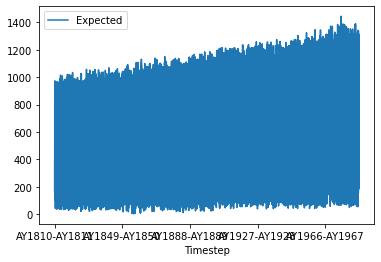

In [ ]:
df.plot(x='Timestep', y='Expected')

In [ ]:
X_train=df['Timestep']
Y_train=df['Expected']
X_test=df_2['Timestep']
X_new=[None]*90000
X_test_new=[None]*10000
Y_without_one=[None]*90000


In [ ]:
for i in range(len(X_train)):
  X_new[i]=int(X_train[i][2:6])
for i in range(len(X_test)):
  X_test_new[i]=int(X_test[i][2:6])
# for i in range(len(Y)):
#   if Y[i]<=2:
#     Y_without_one[i]=3
#   else:
#     Y_without_one[i]=Y[i]
# Y_without_one_train=Y_without_one[:81000]
# Y_without_one_test=Y_without_one[81000:]

In [ ]:
df['new_timestep']=X_new
df_2['new_timestep']=X_test_new

In [ ]:
import numpy as np
mean=np.mean(X_new)
sd=np.std(X_new)
X_normalized=[None]*90000
X_normalized_test=[None]*10000
for i in range(len(X_new)):
  X_normalized[i]=(X_new[i]-mean)/(sd)
for i in range(len(X_test_new)):
  X_normalized_test[i]=(X_test_new[i]-mean)/(sd)




Normalization of train


In [ ]:
df['norm_time']=X_normalized
df_2['norm_time']=X_normalized_test

In [ ]:
X_normalized_train=np.asarray(X_normalized)
X_normalized_test=np.asarray(X_normalized_test)
# X_normalized_train=X_normalized_array[:81000]
# X_normalized_test=X_normalized_array[81000:]

In [ ]:
X_normalized_train.resize(90000,1)
X_normalized_test.resize(10000,1)

In [ ]:
X_new=df['new_timestep']
df.tail()
from sklearn.preprocessing import LabelBinarizer
le=LabelBinarizer()
X_Course_train = le.fit_transform(df.Course)
X_Course_test = le.transform(df_2.Course)
from sklearn.preprocessing import LabelBinarizer
le2=LabelBinarizer()
X_Faculty_train = le2.fit_transform(df.Faculty)
X_Faculty_test = le2.transform(df_2.Faculty)

In [ ]:
import numpy as np
  
arr1 = np.array(X_Course_train)
arr2 = np.array(X_Faculty_train)
arr3 = np.array(X_normalized_train)
  
X_combined_train = np.concatenate((arr1, arr2), axis = 1)
for i in range(5):
  X_combined_train=np.concatenate((arr3,X_combined_train,arr3),axis=1)

ar1 = np.array(X_Course_test)
ar2 = np.array(X_Faculty_test)
ar3 = np.array(X_normalized_test)
  
X_combined_test = np.concatenate((ar1, ar2), axis = 1)
for i in range(5):
  X_combined_test=np.concatenate((ar3,X_combined_test,ar3),axis=1)

In [ ]:
X_combined_test_dash = X_combined_test

In [ ]:
X_combined_test = X_combined_train[80000:84000]
Y_test = Y_train[80000:84000]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_combined_train = X_combined_train[86000:90000]
Y_train = Y_train[86000:90000]


In [ ]:
X_combined_test

array([[1.33806457, 1.33806457, 1.33806457, ..., 1.33806457, 1.33806457,
        1.33806457],
       [1.33806457, 1.33806457, 1.33806457, ..., 1.33806457, 1.33806457,
        1.33806457],
       [1.33806457, 1.33806457, 1.33806457, ..., 1.33806457, 1.33806457,
        1.33806457],
       ...,
       [1.49517582, 1.49517582, 1.49517582, ..., 1.49517582, 1.49517582,
        1.49517582],
       [1.49517582, 1.49517582, 1.49517582, ..., 1.49517582, 1.49517582,
        1.49517582],
       [1.49517582, 1.49517582, 1.49517582, ..., 1.49517582, 1.49517582,
        1.49517582]])

In [ ]:
path = "/content/drive/Shareddrives/hack22/hack22/"

In [ ]:
import pickle

In [ ]:
member = []

In [ ]:
with open(path + 'linear_3.sav', 'rb') as file:  
    print(file)
    model1 = pickle.load(file)

print(model1)
member.append(model1)
array1 = model1.predict(X_combined_train)

<_io.BufferedReader name='/content/drive/Shareddrives/hack22/hack22/linear_3.sav'>
LinearRegression()


In [ ]:
with open(path + 'lin.sav', 'rb') as file:  
    model2 = pickle.load(file)

print(model2)
member.append(model2)
array2 = model2.predict(X_combined_train)

LinearRegression()


In [ ]:
with open(path + 'other_linear.sav', 'rb') as file:  
    model3= pickle.load(file)

print(model3)
member.append(model3)
array3 = model3.predict(X_combined_train)

LinearRegression()


In [ ]:
with open(path + 'soft.sav', 'rb') as file:  
    model4= pickle.load(file)

print(model4)
member.append(model4)
array4 = model4.predict(X_combined_train)

VotingRegressor(estimators=[('sgd',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('sgdregressor',
                                              SGDRegressor())])),
                            ('lin', LinearRegression())])


In [ ]:
with open(path + 'soft3.sav', 'rb') as file:  
    model5= pickle.load(file)

print(model5)
member.append(model5)
array5 = model5.predict(X_combined_train)

VotingRegressor(estimators=[('sgd',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('sgdregressor',
                                              SGDRegressor())])),
                            ('lin', LinearRegression())])


In [ ]:
with open(path + 'soft3.sav', 'rb') as file:  
    model6= pickle.load(file)

print(model6)
member.append(model6)
array6 = model6.predict(X_combined_train)

VotingRegressor(estimators=[('sgd',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('sgdregressor',
                                              SGDRegressor())])),
                            ('lin', LinearRegression())])


In [ ]:
array1_t = model1.predict(X_combined_test)
array2_t = model2.predict(X_combined_test)
array3_t = model3.predict(X_combined_test)
array4_t = model4.predict(X_combined_test)
array5_t = model5.predict(X_combined_test)
array6_t = model6.predict(X_combined_test)

In [ ]:
data = np.array([array1.flatten(), array2.flatten(), array3.flatten(), array4.flatten(), array5.flatten(),array6.flatten()])
df = pd.DataFrame(data=data)
df = df.T

In [ ]:
df.head()

,0,1,2,3,4,5
0,377.203125,375.34375,380.000,376.816825,369.208299,369.208299
1,603.703125,601.84375,605.750,610.572430,603.092418,603.092418
2,958.703125,963.46875,962.125,964.552035,966.821598,966.821598
3,746.703125,746.34375,745.000,743.267427,750.087826,750.087826
4,913.703125,913.34375,921.000,915.460116,910.118526,910.118526


In [ ]:
Y_train

86000     382
86001     599
86002     942
86003     728
86004     908
         ... 
89995     476
89996     222
89997     295
89998     187
89999    1103
Name: Expected, Length: 4000, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(9, activation='relu'))
# model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 63        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 10        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(df, Y_train, epochs=5, batch_size=32, verbose=1)
# predictions = model.predict(xval_scale)


Epoch 1/5
125/125 [==============================] - 1s 2ms/step - loss: 351781.1562 - mse: 351781.1562 - mae: 540.5771
Epoch 2/5
125/125 [==============================] - 0s 2ms/step - loss: 50393.5898 - mse: 50393.5898 - mae: 171.5352
Epoch 3/5
125/125 [==============================] - 0s 2ms/step - loss: 249.7299 - mse: 249.7299 - mae: 12.1593
Epoch 4/5
125/125 [==============================] - 0s 2ms/step - loss: 208.0952 - mse: 208.0952 - mae: 11.3171
Epoch 5/5
125/125 [==============================] - 0s 2ms/step - loss: 208.0532 - mse: 208.0532 - mae: 11.3150


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = np.array([array1_t.flatten(), array2_t.flatten(), array3_t.flatten(), array4_t.flatten(),array5_t.flatten(),array6_t.flatten()])
df_T = pd.DataFrame(data=data)
df_T = df_T.T

In [ ]:
predictions = model.predict(df_T)

In [ ]:
from sklearn.metrics import  mean_squared_error
mean_squared_error(Y_test,predictions, squared = False)

21.634064339813946

In [ ]:
arr_1 = model1.predict(X_combined_test_dash)
arr_2 = model2.predict(X_combined_test_dash)
arr_3 = model3.predict(X_combined_test_dash)
arr_4 = model4.predict(X_combined_test_dash)
arr_5 = model4.predict(X_combined_test_dash)

arr_6 = model4.predict(X_combined_test_dash)

In [ ]:
data = np.array([arr_1.flatten(), arr_2.flatten(), arr_3.flatten(), arr_4.flatten(),arr_5.flatten(),arr_6.flatten()])
df_TT = pd.DataFrame(data=data)
df_TT = df_TT.T

In [ ]:
predictions = model.predict(df_TT)

In [ ]:
predictions.resize(10000,)
predictions.shape

(10000,)

In [ ]:
ids=df_2['Id']
ids=ids.array
ids.shape

(10000,)

In [ ]:
data={'Id':ids,'Predicted':predictions}
df3=pd.DataFrame(data)

In [ ]:
df3.to_csv('Final.csv')

dict_keys(['loss', 'mse', 'mae'])


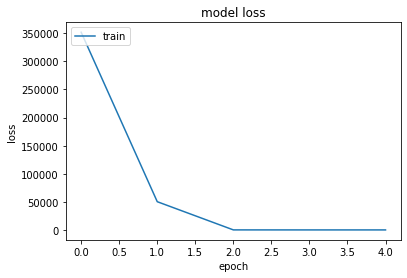

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()